In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

/home/amoshyc/miniconda3/envs/nthu-dl/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
class LinearRegressor:
    '''Closed-form solution'''
    def __init__(self):
        self.W = None
    
    def fit(self, xs, ys):
        self.W = np.linalg.pinv(xs.T @ xs) @ xs.T @ ys
    
    def predict(self, xs):
        return xs @ self.W
    
xs = np.random.rand(100, 2)
ys = xs[:, 0] * 3 + xs[:, 1] * 4
reg = LinearRegressor()
reg.fit(xs, ys)

print(ys[:10])
print(reg.predict(xs)[:10])

[2.98407468 2.6622037  2.19996728 1.53761355 4.13363726 4.05282614
 1.17655078 4.7773281  3.65890174 2.75260197]
[2.98407468 2.6622037  2.19996728 1.53761355 4.13363726 4.05282614
 1.17655078 4.7773281  3.65890174 2.75260197]


In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values

In [4]:
xt, xv, yt, yv = train_test_split(X, y, test_size=0.3, random_state=50)

stdx = StandardScaler()
stdx.fit(xt)
xt_std = stdx.transform(xt)
xv_std = stdx.transform(xv)

print(xt_std.shape, yt.shape)
print(xv_std.shape, yv.shape)

(1491, 11) (1491,)
(639, 11) (639,)


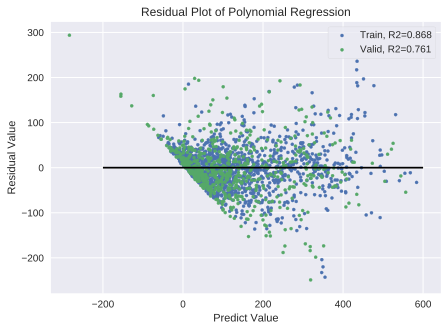

In [5]:
poly = PolynomialFeatures(degree=4)
poly.fit(xv_std)
xt_poly = poly.transform(xt_std)
xv_poly = poly.transform(xv_std)

reg = LinearRegressor()
reg.fit(xt_poly, yt)
pt = reg.predict(xt_poly)
pv = reg.predict(xv_poly)

fig, ax = plt.subplots(dpi=100, figsize=(7, 5))
ax.scatter(pt, yt - pt, s=10, label=f'Train, R2={r2_score(yt, pt):.3f}')
ax.scatter(pv, yv - pv, s=10, label=f'Valid, R2={r2_score(yv, pv):.3f}')
ax.hlines(y=0, xmin=-200, xmax=600)
ax.legend(frameon=True)
ax.set_title('Residual Plot of Polynomial Regression')
ax.set_xlabel('Predict Value')
ax.set_ylabel('Residual Value')
plt.show()

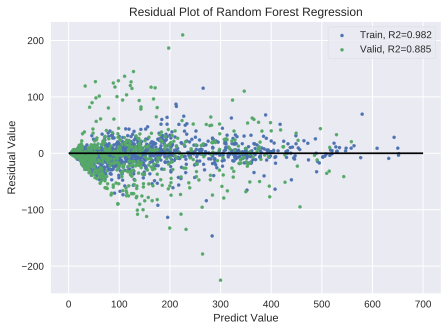

In [6]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(xt_std, yt)
pt = reg.predict(xt_std)
pv = reg.predict(xv_std)

fig, ax = plt.subplots(dpi=100, figsize=(7, 5))
ax.scatter(pt, yt - pt, s=10, label=f'Train, R2={r2_score(yt, pt):.3f}')
ax.scatter(pv, yv - pv, s=10, label=f'Valid, R2={r2_score(yv, pv):.3f}')
ax.hlines(y=0, xmin=0, xmax=700)
ax.legend(frameon=True)
ax.set_title('Residual Plot of Random Forest Regression')
ax.set_xlabel('Predict Value')
ax.set_ylabel('Residual Value')
plt.show()